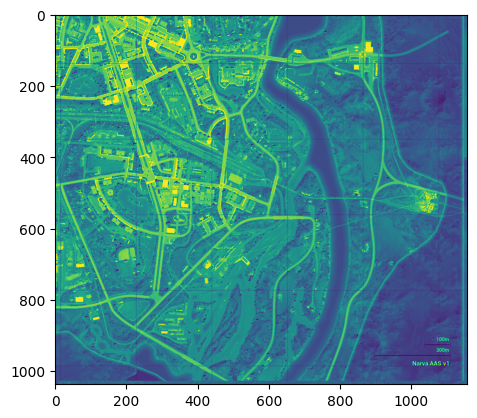

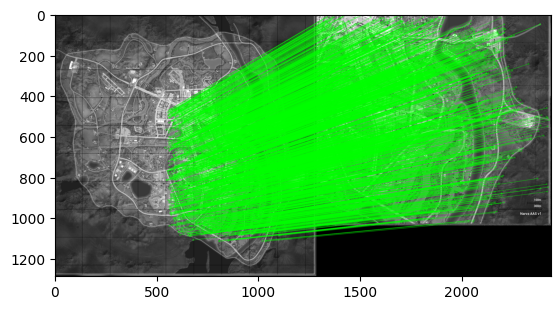

mask
[[ 1.54764626e+00  6.81071116e-05 -8.27200037e+02]
 [ 5.93730191e-05  1.54882487e+00 -7.08837368e+02]
 [-3.70618287e-08  6.68806178e-09  1.00000000e+00]]
(2245, 1)


In [57]:
import cv2
import numpy as np
import math
import pandas as pd
import cv2 as cv
import scipy.stats as stats
from matplotlib import pyplot as plt

%matplotlib inline

MIN_MATCH_COUNT = 10
base = cv.imread('narva.png', cv.IMREAD_GRAYSCALE)  # queryImage
segment_image = cv.imread('narva_sub5.png', cv.IMREAD_GRAYSCALE)


def correlate(base, segment_image):
    base = base.copy()
    segment_image = segment_image.copy()
    # Initiate SIFT detector
    sift = cv.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(base, None)
    kp2, des2 = sift.detectAndCompute(segment_image, None)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good.append(m)
    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
        matches_mask = mask.ravel().tolist()
        h, w = base.shape
        # pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
        # dst = cv.perspectiveTransform(pts, M)
        # segment_image = cv.polylines(segment_image, [np.int32(dst)], True, (0, 255, 0,), 3, cv.LINE_AA)
        # plt.imshow(segment_image), plt.show()
        draw_params = dict(matchColor = (0,255,0),  # draw matches in green color
                           singlePointColor = None,
                           matchesMask = matches_mask,  # draw only inliers
                           flags = 2)
        plt.imshow(segment_image), plt.show()

        img3 = cv.drawMatches(base, kp1, segment_image, kp2, good, None, **draw_params)

        # find center of segment_image, and superimpose on base
        plt.imshow(img3), plt.show()
        plt.close()
    else:
        print("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))
        matches_mask = None

    return src_pts, dst_pts, M, mask, matches_mask



src_pts, dst_pts, M, mask, matches_mask = correlate(base, segment_image)

plt.show()
plt.close()

print("mask")
print(M)
print(mask.shape)




# correlate(cv.imread('narva_sub3.png', cv.IMREAD_GRAYSCALE))
# correlate(cv.imread('narva_sub4.png', cv.IMREAD_GRAYSCALE))



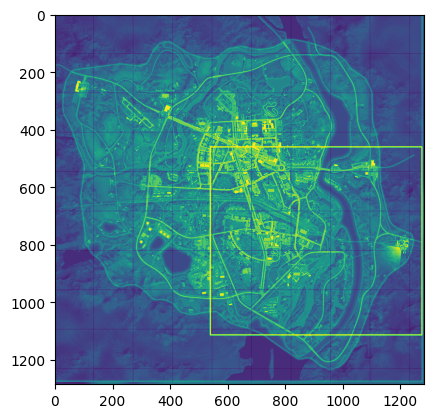

(<matplotlib.image.AxesImage at 0x7fe3b4108a90>, None)

In [58]:
# remove masked dst_pts with index based mask
dst_pts = np.array([p for i, p in enumerate(src_pts) if matches_mask[i] == 1])


dst_pts_y = dst_pts.reshape(-1, 2)[:, 0]
dst_pts_x = dst_pts.reshape(-1, 2)[:, 1]

top_left = np.min(dst_pts_y).astype(int), np.min(dst_pts_x).astype(int)
bottom_right = np.max(dst_pts_y).astype(int), np.max(dst_pts_x).astype(int)


base_with_rect = cv.rectangle(base, top_left, bottom_right, (255,255,255), 3)
plt.imshow(base_with_rect), plt.show()



# segment_image = cv.circle(segment_image, (center[0], center[1]), 200, (0,0,255), -1)
# plt.imshow(segment_image), plt.show()
# find average scaling factor

# pts_mid = np.array(list(center)
# dst_mid = cv.perspectiveTransform(pts_mid, M)
# print(pts_mid)
# base_cp = base.copy()
# cv.circle(base_cp, dst_mid, )


In [59]:
top_left, bottom_right

((538, 461), (1272, 1114))

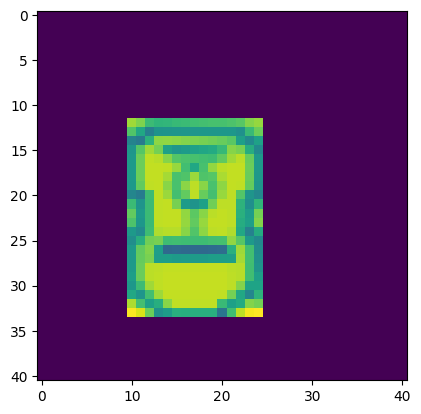

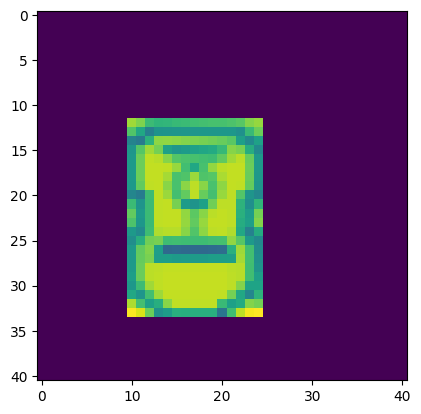

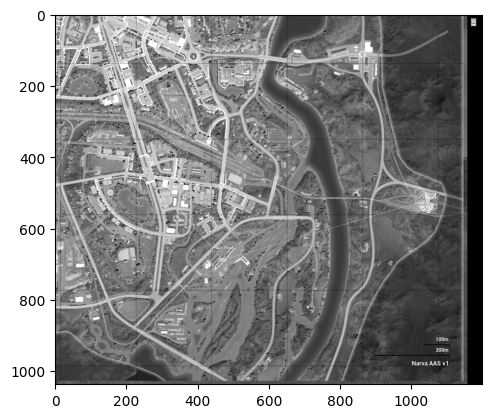

In [62]:
center = ((bottom_right[0] - top_left[0]) / 2) + top_left[0], ((bottom_right[1] - top_left[1]) / 2) + top_left[1]
center = center[0].astype(int), center[1].astype(int)

# base = base.copy()
# base_with_center = cv.circle(base, center, 50, (255,255,255), -1)
# plt.imshow(base_with_center), plt.show()


car = cv.imread('car2_masked.png', cv.IMREAD_GRAYSCALE)
segment_image = cv.imread('narva_sub5.png', cv.IMREAD_GRAYSCALE)
# car = cv.cvtColor(car, cv.COLOR_BGR2RGB)

plt.imshow(car), plt.show()

src_pts, dst_pts, M, mask, matches_mask = correlate(segment_image, car)


In [5]:
import numpy as np
d1 = np.array([[1,3], [4,7]])
d2 = np.array([[4,5], [7,8]])
d1 + d2

array([[ 5,  8],
       [11, 15]])